In [1]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib as mpl 
import matplotlib.pyplot as plt

sys.path.insert(0, '../../icenumerics/')
sys.path.insert(0, './auxnumerics/')
import icenumerics as ice

import auxiliary as aux
import montecarlo_tools as mc
import chirality_tools as chir
from parameters import params,QUENCH
ureg = ice.ureg

%reload_ext autoreload
%autoreload 2

idx = pd.IndexSlice

In [2]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
vis_path = '../data/sims'
trj_raw = pd.read_csv(os.path.join(vis_path,'30','trj','trj1.csv'),index_col=[0,1])

In [4]:
particle = ice.particle(radius = params["particle_radius"],
            susceptibility = params["particle_susceptibility"],
            diffusion = params["particle_diffusion"],
            temperature = params["particle_temperature"],
            density = params["particle_density"])

trap = ice.trap(trap_sep = params["trap_sep"],
            height = params["trap_height"],
            stiffness = params["trap_stiffness"])


params["particle"] = particle
params["trap"] = trap


In [5]:
initial_frame = (params['framespersec'] * 0).magnitude
vrt_df = pd.read_csv(os.path.join(vis_path,'30','vertices','vertices6.csv'), index_col=[0,1] )
vrt_frames = vrt_df.index.get_level_values("frame").unique().to_list()
analysis_frames = [frame for frame in vrt_frames if frame > initial_frame][::5]
vrt_frames

[0,
 20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500,
 520,
 540,
 560,
 580,
 600,
 620,
 640,
 660,
 680,
 700,
 720,
 740,
 760,
 780,
 800,
 820,
 840,
 860,
 880,
 900,
 920,
 940,
 960,
 980,
 1000,
 1020,
 1040,
 1060,
 1080,
 1100,
 1120,
 1140,
 1160,
 1180,
 1200,
 1220,
 1240,
 1260,
 1280,
 1300,
 1320,
 1340,
 1360,
 1380,
 1400,
 1420,
 1440,
 1460,
 1480,
 1500,
 1520,
 1540,
 1560,
 1580,
 1600,
 1620,
 1640,
 1660,
 1680,
 1700,
 1720,
 1740,
 1760,
 1780,
 1800,
 1820,
 1840,
 1860,
 1880,
 1900,
 1920,
 1940,
 1960,
 1980,
 2000,
 2020,
 2040,
 2060,
 2080,
 2100,
 2120,
 2140,
 2160,
 2180,
 2200,
 2220,
 2240,
 2260,
 2280,
 2300,
 2320,
 2340,
 2360,
 2380,
 2400,
 2420,
 2440,
 2460,
 2480,
 2500,
 2520,
 2540,
 2560,
 2580,
 2600,
 2620,
 2640,
 2660,
 2680,
 2700,
 2720,
 2740,
 2760,
 2780,
 2800,
 2820,
 2840,
 2860,
 2880,
 2900,
 2920,
 2940,
 2960,
 2980,
 3000,

In [6]:
data_path = os.path.join(vis_path,'30')

In [29]:
psi= []
for frame in tqdm(analysis_frames):
    results = [chir.get_charge_order_on_frame_on_realization(params,data_path,frame,realization,tol=1.6) for realization in range(1,10+1) ]
    psi.append(results)

100%|██████████| 72/72 [22:31<00:00, 18.77s/it]


In [36]:
psidf = pd.DataFrame(psi)
psidf['frame'] = analysis_frames
psidf.set_index('frame',inplace=True)
psidf.to_csv('../data/sims/kappa.csv')

In [9]:
psidf = pd.read_csv('../data/sims/kappa.csv', index_col='frame')
psi = psidf.to_numpy()

In [10]:
psi_av = np.array(np.abs(psi)).mean(axis=1)
psi_std = np.array(np.abs(psi)).std(axis=1)
time = np.array(analysis_frames)/20
field = 10/300 * time

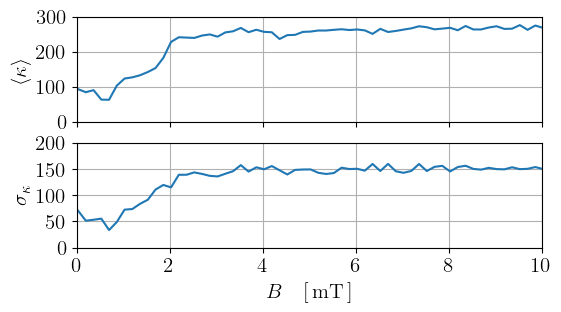

In [41]:
fig, axes = plt.subplots(2,1,figsize=(6,3))

ax = axes[0]
ax.plot(field,psi_av)
ax.set_xlim(0,10)
ax.set_xticklabels([])
ax.set_ylim(0,300)
ax.set_yticks(list(range(0,301,100)))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('$\\langle \kappa \\rangle$', fontsize=15)
ax.set_xlim(0,10)

ax.grid()

ax = axes[1]
ax.plot(field,psi_std)
ax.set_xlim(0,10)
ax.set_ylim(0,200)
ax.set_yticks(list(range(0,201,50)))
ax.tick_params(axis='both', which='major', labelsize=15)




ax.set_xlabel('$B$ \,\, [\,mT\,]', fontsize=15)
ax.set_ylabel('$\sigma_\kappa$', fontsize=15)
ax.grid()

plt.show()

fig.savefig('../data/figs/fig3cd.png', dpi=300,bbox_inches='tight')
fig.savefig('../data/figs/fig3cd.pdf')

In [71]:
fig.savefig('../data/figs/fig3cd.png',dpi=300,bbox_inches='tight')
fig.savefig('../data/figs/fig3cd.pdf',bbox_inches='tight')